
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.
it involves collecting, aggregating, cleaning, and organizing the data to be consumed by the algorithms designed to make discoveries or to create models.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description
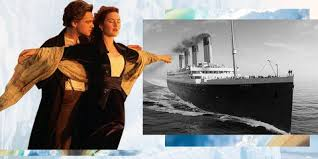

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Some Background Information
The sinking of the RMS Titanic in the early morning of __15 April 1912, four days into the ship's maiden voyage__ from __Southampton to New York City__, was one of the deadliest peacetime maritime disasters in history, __killing more 
than 1,500 people__. The largest passenger liner in service at the time, Titanic had an __estimated 2,224 people on 
board__ when she struck an __iceberg in the North Atlantic__. The ship had received __six warnings__ of sea ice but 
was travelling at near __maximum speed when the lookouts sighted the iceberg__. Unable to turn quickly enough, the 
ship suffered a glancing blow that buckled the starboard (right) side and opened __five of sixteen compartments to 
the sea__. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the __unequal treatment__ of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the __International Convention for the Safety of Life at Sea (1914)__, which continues to govern maritime safety.

In [232]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip
Note: you may need to restart the kernel to use updated packages.


#### Importing packages                                          

In [233]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output ###Assignment



#### Importing the Dataset

In [234]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/amity1415/DS/main/EKeeda/titanicRawData.csv")



In [235]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
type(titanic_data)

pandas.core.frame.DataFrame

In [237]:
titanic_data.info() ## It helps provide the sturcture of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [238]:
i = titanic_data.Name[1]
type(i)

str

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [239]:
titanic_data.shape ## This will print the number of rows and columns of the Data Frame

(891, 12)

titanic_data has __891 rows__ and __12 columns.__

In [240]:
titanic_data.columns # THis will print the names of all columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [241]:
 titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id=section301></a>

In [242]:
 titanic_data.tail() # This will print the last n rows of the Data Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [243]:
titanic_data.isnull().sum() # Finding the count od null values in the data set.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above output we can see that __Age__ and __Cabin__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [244]:
 profile = pandas_profiling.ProfileReport(titanic_data) 

In [245]:
 profile.to_file(output_file="titanic_before_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

In [246]:
for name in titanic_data.Name:
    print(name)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [247]:
titanic_data['Embarked'].value_counts() #Value Counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [248]:
titanic_data[titanic_data['Embarked'].isnull()] # Finding out the details of the the passanger whose Embarked Data is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [249]:
titanic_data['Embarked'].mode() # To find the mode of the Embarked Data

0    S
Name: Embarked, dtype: object

In [250]:
titanic_data['Embarked'].mode()[0] #Getting the Mode Value using the [0] index

'S'

In [251]:
titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0], inplace=True) # Inline Changes

In [252]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [253]:
#titanic_data[titanic_data['Embarked'].isnull()]
titanic_data[titanic_data['Embarked'].isnull()]['Embarked'] # We get a series when we expect a column output.

Series([], Name: Embarked, dtype: object)

In [254]:
#Dealing with the Null Values of the Age Data
# Perventage Survived in the Age missing dataset.
(titanic_data[titanic_data['Age'].isnull()]['Survived'].sum()/titanic_data[titanic_data['Age'].isnull()].Survived.value_counts().sum() )*100

29.37853107344633

In [255]:
(titanic_data.Survived.sum()/titanic_data.Survived.value_counts().sum())*100 # Percentage Survived in overall data set

38.38383838383838

In [256]:
titanic_data.Age.median()

28.0

In [257]:
median_age= titanic_data.Age.median()# Filling the missing values with Median Value of Age
titanic_data['Age']= titanic_data.Age.fillna(median_age)

In [258]:
#Rechecking is the null values got filled with median
titanic_data[titanic_data['Age'].isnull()].Age


Series([], Name: Age, dtype: float64)

In [259]:
#Dropping the Cabin column as the no. of data rows are very low and is not supposed to contribute much to the Analysis.
titanic_data.drop('Cabin', axis=1, inplace=True)

In [260]:
titanic_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [261]:
titanic_data.drop('Ticket', axis=1, inplace=True)
titanic_data.drop('PassengerId', axis=1, inplace=True)

In [262]:
titanic_data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


 We that is now the case and all the passangers are well over 18 years of age.

In [263]:
titanic_data[titanic_data.Age<=1].Fare

78      29.0000
164     39.6875
172     11.1333
183     39.0000
305    151.5500
381     15.7417
386     46.9000
469     19.2583
644     19.2583
755     14.5000
788     20.5750
803      8.5167
827     37.0042
831     18.7500
Name: Fare, dtype: float64

In [264]:
titanic_data[titanic_data.Fare==0].Age ## Checking the age of passengers with 0 Fare. 


179    36.0
263    40.0
271    25.0
277    28.0
302    19.0
413    28.0
466    28.0
481    28.0
597    49.0
633    28.0
674    28.0
732    28.0
806    39.0
815    28.0
822    38.0
Name: Age, dtype: float64

In [265]:
# Checking the median value of fare
titanic_data.Fare.median()

14.4542

In [266]:
#Replace the 0 value of Fare with median Value. Cansidering that 0 value of fare was input by mistake.
titanic_data['Fare']= titanic_data['Fare'].replace(0, titanic_data.Fare.median())

In [267]:
titanic_data[titanic_data.Fare==0].Age #Rechecking if 0 Fare Exists.


Series([], Name: Age, dtype: float64)

In [268]:
titanic_data.Fare.mean()

32.4475446689113

In [269]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1 ) #Creating a new column

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [270]:
titanic_data[titanic_data.Age>15].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,GenderClass
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,female
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,female
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,male


In [271]:
#Create a new Column : Family Size
titanic_data['FamilySize'] = titanic_data['SibSp']+ titanic_data['Parch']+1 

In [272]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,GenderClass,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,male,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,female,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,female,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,female,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,male,1


In [273]:
titanic_data.drop('Sex', axis=1, inplace=True) # Since we created Gender class, we are dropping the sex column.


In [274]:
titanic_data.drop('Name', axis=1, inplace=True)

In [275]:
titanic_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,GenderClass,FamilySize
0,0,3,22.0,1,0,7.2500,S,male,2
1,1,1,38.0,1,0,71.2833,C,female,2


In [276]:
titanic_data.drop_duplicates( inplace=True) #Dropping the Duplicate values originated as result of Pandas Preprocessing.

In [277]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,GenderClass,FamilySize
0,0,3,22.0,1,0,7.2500,S,male,2
1,1,1,38.0,1,0,71.2833,C,female,2
2,1,3,26.0,0,0,7.9250,S,female,1
3,1,1,35.0,1,0,53.1000,S,female,2
4,0,3,35.0,0,0,8.0500,S,male,1


<a id=section304></a>

## 3.4 Post Pandas Profiling

In [278]:
#import pandas_profiling
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(output_file="Titanic_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __FamilySize__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __titanic_after_preprocessing.html__ and titanic_before_preprocessing.html.<br/>
In titanic_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __13__ 
- Observe the newly created variable FamilySize, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Of all the passengers, how many survived and how many died ?

- Using Countplot

Text(0.5, 1.0, 'Count plot for survived')

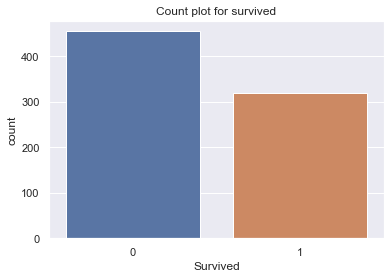

In [279]:
sns.countplot(x='Survived', data=titanic_data).set_title('Count plot for survived')

You can see that __more people died than survived.__ To know the exact count:

- Using groupby

In [280]:
titanic_data.groupby(['Survived'])['Survived'].count()

Survived
0    455
1    319
Name: Survived, dtype: int64

Notice that __455__ people __died__ and only __319 survived.__

<a id=section402></a>

### 4.2 Who is more likely to survive, Male or Female?

First of all looking at how __Age is varying with gender.__

Text(0.5, 1.0, 'Age Distribution using FacetGrid')

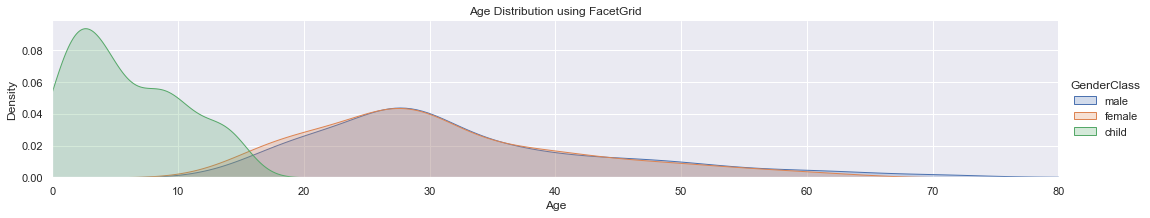

In [281]:
as_fig=sns.FacetGrid(titanic_data,hue='GenderClass', aspect=5)
as_fig.map(sns.kdeplot,'Age', shade=True)
oldest = titanic_data['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age Distribution using FacetGrid')


- In titanic RMS __child__ of Age __3-8__ yrs are in majority.
- Maximum __males and females__ are of Age __25-35__ yrs. 

Using groupby

In [313]:
titanic_data.groupby(['Survived','GenderClass','Pclass'])['Survived'].value_counts()

Survived  GenderClass  Pclass  Survived
0         child        1       0             1
                       3       0            32
          female       1       0             2
                       2       0             6
                       3       0            53
          male         1       0            74
                       2       0            75
                       3       0           212
1         child        1       1             4
                       2       1            18
                       3       1            21
          female       1       1            89
                       2       1            56
                       3       1            48
          male         1       1            40
                       2       1             8
                       3       1            35
Name: Survived, dtype: int64

From the above you can see that its __difficult__ to absorb information quickly by looking at __numbers.__ Therefore we will make variety of plots to get clear vision of the scenario.

- Using factorplot 

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Factor plot for male female and child')

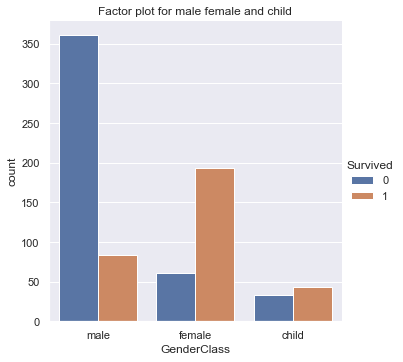

In [283]:
sns.factorplot('GenderClass', hue='Survived', kind= 'count', data=titanic_data)
plt.title('Factor plot for male female and child')

In [284]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].count() # Total Female 

254

In [285]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()# Total Female that survived

193

- Majority of __males died__.
- __Females__ have high probability to __survive.__

To know the exact %

In [286]:
print("% of women survived: ", titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'female']['Survived'].count()*100)
print("% of male survived: ", titanic_data[titanic_data.GenderClass == 'male']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'male']['Survived'].count()*100)
print("% of children survived: ", titanic_data[titanic_data.GenderClass == 'child']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'child']['Survived'].count()*100)

% of women survived:  75.98425196850394
% of male survived:  18.693693693693696
% of children survived:  56.57894736842105


- Using pie plot

Text(0.5, 1.0, 'Survived (child)')

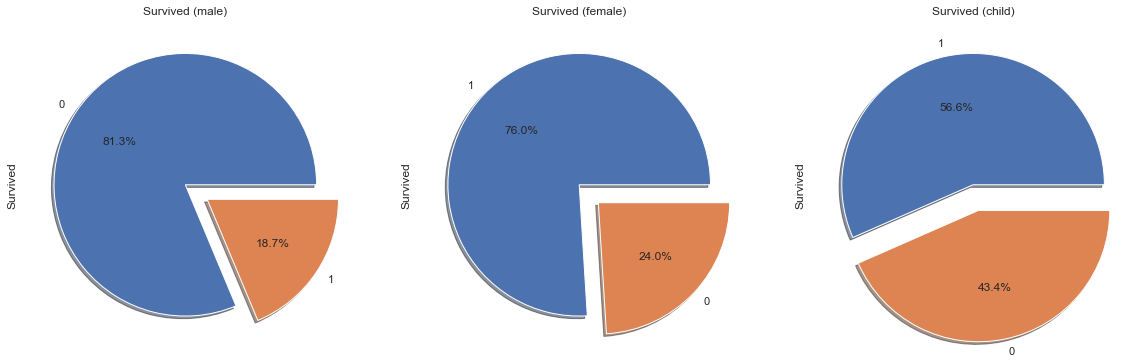

In [288]:
f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass']=='female'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass']=='child'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[2], shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')

From the above pie plot you can see how survival depends on whether the passenger is a child, male or female.
- __76% of females__ survived.
- __57% of children__ also survived.
- Only __16% of males__ survived.

In [297]:
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts()

0    361
1     83
Name: Survived, dtype: int64

In [298]:
titanic_data['Survived'][titanic_data['GenderClass']=='female'].value_counts()

1    193
0     61
Name: Survived, dtype: int64

<a id=section403></a>

### 4.4. What is the rate of survival of males, females and child on the basis of Passenger Class?

- Using mathematical function

In [300]:
print("% of Survuval in PClass=1: ", titanic_data[titanic_data.Pclass==1]['Survived'].sum()/ titanic_data[titanic_data.Pclass==1]['Survived'].count()*100)
print("% of Survuval in PClass=2: ", titanic_data[titanic_data.Pclass==2]['Survived'].sum()/ titanic_data[titanic_data.Pclass==2]['Survived'].count()*100)
print("% of Survuval in PClass=3: ", titanic_data[titanic_data.Pclass==3]['Survived'].sum()/ titanic_data[titanic_data.Pclass==3]['Survived'].count()*100)

% of Survuval in PClass=1:  63.33333333333333
% of Survuval in PClass=2:  50.306748466257666
% of Survuval in PClass=3:  25.935162094763093


- Using crosstab function

In [305]:
pd.crosstab([titanic_data.GenderClass, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

In [314]:
titanic_data.groupby(['Survived','GenderClass','Pclass'])['Survived'].value_counts()

Survived  GenderClass  Pclass  Survived
0         child        1       0             1
                       3       0            32
          female       1       0             2
                       2       0             6
                       3       0            53
          male         1       0            74
                       2       0            75
                       3       0           212
1         child        1       1             4
                       2       1            18
                       3       1            21
          female       1       1            89
                       2       1            56
                       3       1            48
          male         1       1            40
                       2       1             8
                       3       1            35
Name: Survived, dtype: int64

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


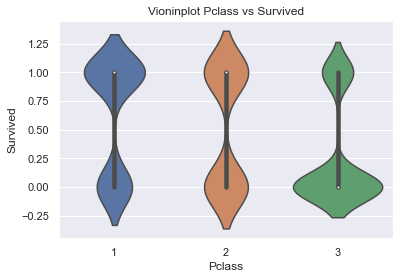

In [315]:
sns.violinplot('Pclass','Survived',kind='point', data=titanic_data)
plt.title('Vioninplot Pclass vs Survived')
plt.show()

Above is another beautiful way to see how the survival rate is varying with Passenger class.
- __Pclass 3__ have __more__ people who __died__, and for __Pclass 1 survival rate is more.__

 Drawing __factorplot__ to look at the __distribution of popluation__ with __Pclass and GenderClass.__

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Factorplot with kind= "Count" for Pclass and GenderClass')

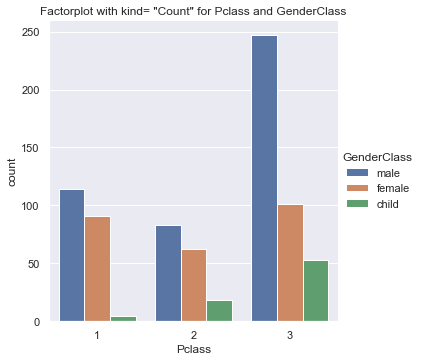

In [317]:
sns.factorplot('Pclass', data=titanic_data, hue='GenderClass',kind='count')
plt.title('Factorplot with kind= "Count" for Pclass and GenderClass')

1. __Pclass 3__ have _maximum_ number of __males__
2. __Pclass 1__ have _minimum_ number of __children__.

- using factorplot to see the variation of __surviavl rate with Pclass and GenderClass.__

Text(0.5, 1.0, 'Factorplot for Survival rate variation with Pclass and GenderClass')

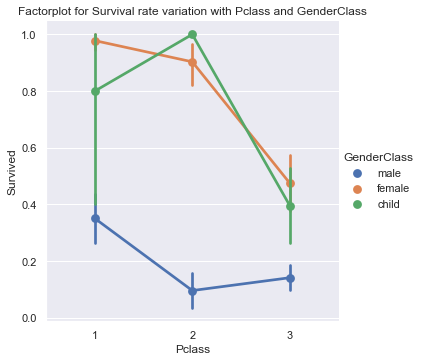

In [320]:
sns.factorplot('Pclass','Survived', data=titanic_data, hue='GenderClass')
plt.title('Factorplot for Survival rate variation with Pclass and GenderClass')

The above graph shows:
1. the survival rate for male is very __low__ _irrespective of the class_ he belongs to. 
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Pclass __1 and 2 survived__ and __nearly all men__ in Pclass __2 and 3 died.__

<a id=section404></a>

### 4.4 What is the survival rate considering the Embarked variable?

- Using countplot 

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

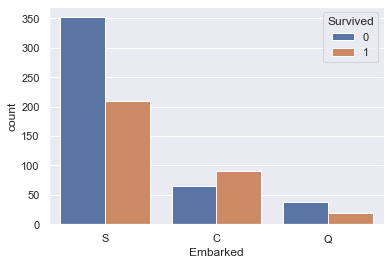

In [321]:
sns.countplot('Embarked', data=titanic_data, hue='Survived')

In [328]:
# 6% of the females survived from the overall data set and who embarked at C and were females.
100*titanic_data.groupby(['Embarked','GenderClass'])['Survived'].value_counts()/len(titanic_data)

Embarked  GenderClass  Survived
C         child        1            1.421189
                       0            0.387597
          female       1            6.976744
                       0            0.904393
          male         0            7.105943
                       1            3.229974
Q         child        0            0.516796
          female       1            2.196382
                       0            1.162791
          male         0            3.229974
                       1            0.387597
S         child        1            4.134367
                       0            3.359173
          female       1           15.762274
                       0            5.813953
          male         0           36.304910
                       1            7.105943
Name: Survived, dtype: float64

1. __Maximum___ number of people have __Southampton__ as port of embarkment. 
2. Also observe people who boarded at _Cherbourg_, _more_ people _survived than died_, and this is reverse for Queenstown.

- Using __factorplot__ and __kind = 'point'__

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


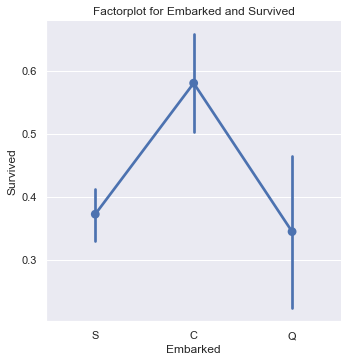

In [331]:
sns.factorplot('Embarked','Survived', kind='point', data=titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

<a id=section405></a>

### 4.5. Survival rate - Comparing Embarked and Sex.

- Distribution of _GenderClass_ with respect to _Port of Embarkment_ using __Countplot__.

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

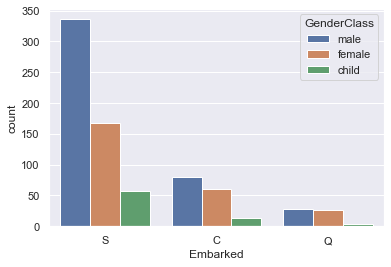

In [330]:
sns.countplot('Embarked', data=titanic_data, hue='GenderClass')

Most of the people boarded from __S__, Also among all who boarded, __males__ constitutes the __majority__ of percentage.

- Using Factorplot to see variation of __survival rate with port of embarkment and GenderClass__

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


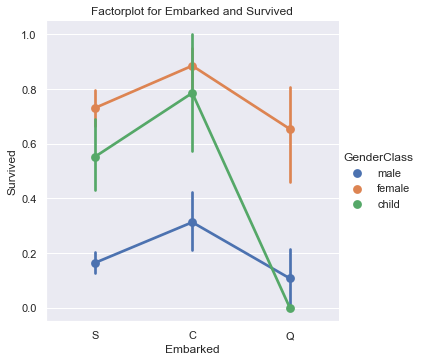

In [333]:
sns.factorplot('Embarked','Survived', kind='point', hue='GenderClass', data=titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

- Chances of survival of __females__ who boarded from __C__ is _highest_.
- Chances of survival of __males__ boarding from __Q__ is _lowest_

<a id=section406></a>

### 4.6 How survival rate vary with Embarked, Sex and Pclass.

Seeing relation between Pclass and Embarked.

Text(0.5, 1.0, 'Relation between Pclass and Embarked')

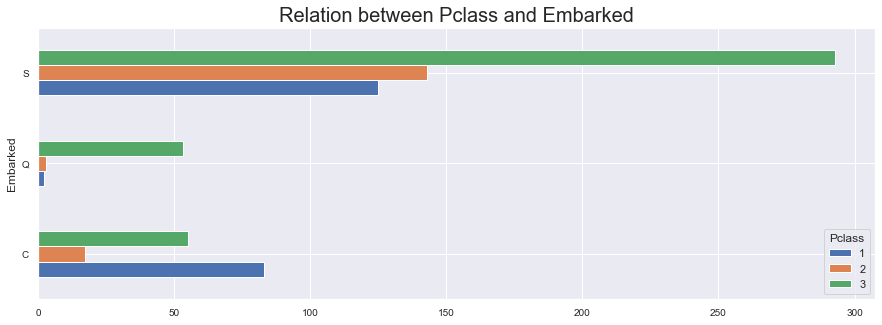

In [334]:
relation = pd.crosstab(titanic_data.Embarked, titanic_data.Pclass)
relation.plot.barh(figsize=(15,5))
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Relation between Pclass and Embarked', size=20)

Maximum people who boarded from __S__ belongs to __Pclass 3__.<br/>
Most of the passengers belonging to __Pclass 1__ boarded from __C and S__  


- Using Swarmplot

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Embarked', ylabel='Age'>

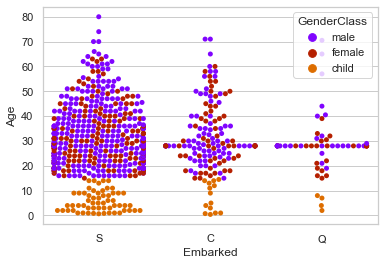

In [336]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x='Embarked',y='Age', hue='GenderClass', palette='gnuplot', data=titanic_data)

- Using factorplot with kind = 'point'

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


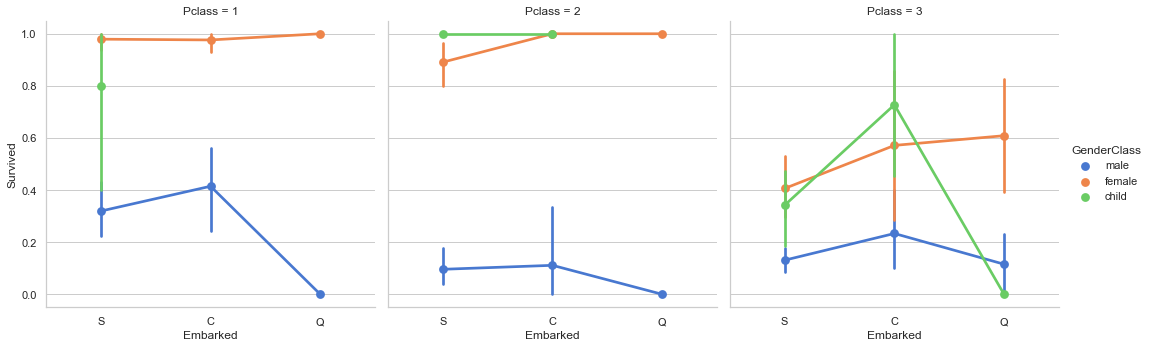

In [337]:
sns.factorplot('Embarked','Survived',col='Pclass', hue='GenderClass', kind='point', data=titanic_data)
plt.show()

- Practically all _women_ of __Pclass 2__ that embarked in __C and Q survived__, also nearly all _women_ of __Pclass 1__ survived_.
- All _men_ of __Pclass 1 and 2__ embarked in __Q died__, survival rate for men in __Pclass 2 and 3__ is always __below 0.2__.
- For the remaining men in Pclass 1 that embarked in S and C, survival rate is approx. __0.4__

<a id=section407></a>

### 4.7 Segment age in bins with size 10.

In [340]:
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['Age']<=i*10, 'Age_bin']=i # 80,70,60,50....

In [344]:
print(titanic_data[['Age','Age_bin']])

      Age  Age_bin
0    22.0      3.0
1    38.0      4.0
2    26.0      3.0
3    35.0      4.0
4    35.0      4.0
..    ...      ...
885  39.0      4.0
887  19.0      2.0
888  28.0      3.0
889  26.0      3.0
890  32.0      4.0

[774 rows x 2 columns]


<AxesSubplot:xlabel='Age_bin', ylabel='Survived'>

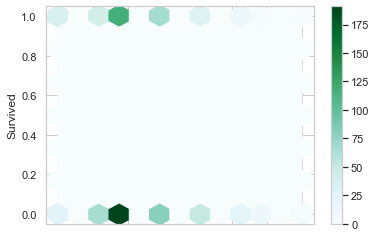

In [342]:
titanic_data.plot.hexbin(x='Age_bin', y='Survived', gridsize=12, legend=True)

Comparing count of those who survived and died with respect to the Age_bin they are in.
- __Age_bin 1__: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means __more children survived than died__.
- __Age_bin 3__: __More died than survived__, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group. 
- __Age_bin >4__: More people died than survived.

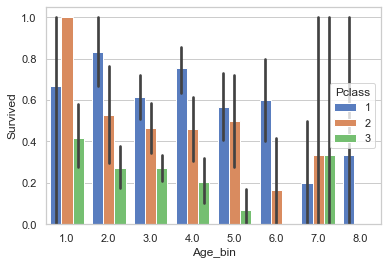

In [346]:
sns.barplot(x='Age_bin',y='Survived', hue='Pclass', data=titanic_data)
plt.show()

- Calculating number of people of Age_bin = 1 and 8 from each Pclass.

In [347]:
titanic_data[(titanic_data.Age_bin==1)]['Pclass'].value_counts()

3    43
2    16
1     3
Name: Pclass, dtype: int64

In [349]:
titanic_data[(titanic_data.Age_bin==8)]['Age'].value_counts()

71.0    2
70.5    1
80.0    1
74.0    1
Name: Age, dtype: int64

In [352]:
titanic_data[(titanic_data.Age_bin==1)&(titanic_data.Pclass==1)]['Survived']

297    0
305    1
445    1
Name: Survived, dtype: int64

In [356]:
titanic_data[(titanic_data.Age_bin==8)]['Pclass'].value_counts()

1    3
3    2
Name: Pclass, dtype: int64

In [360]:
titanic_data[(titanic_data.Age_bin==8)& (titanic_data.Pclass==1)]['Survived'].value_counts()

0    2
1    1
Name: Survived, dtype: int64

In [362]:
titanic_data[(titanic_data.Age_bin==8)& (titanic_data.Pclass==3)]['Survived'].value_counts()

0    2
Name: Survived, dtype: int64

- Among children of __age 0-10 yrs__ we dont have enough data points(3) in Pclass 1, therefore __discarding it__ (blue line of Age_bin 1)<br/>
- Also number of passengers belonging to age group __70-80 yrs__, is very less, therefore __ignoring them.__<br/>
- In __each Pclass__, we can see that the probability of survivying of __small children(Age = 0-10 yrs)__ is _higher_ than rest age group.<br/>
- In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), __survival probability is highest for Pclass 1 and lowest for Pclass 3.__

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


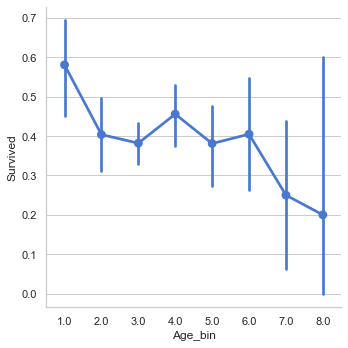

In [364]:
sns.factorplot('Age_bin', 'Survived',kind='point',data=titanic_data)
plt.show()

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


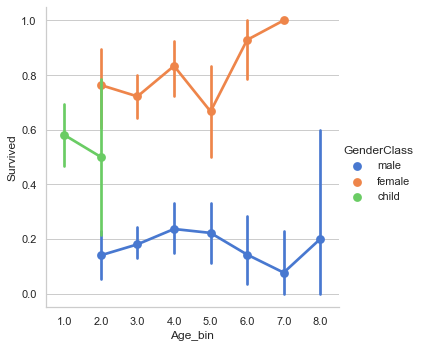

In [366]:
sns.factorplot('Age_bin', 'Survived',kind='point',hue='GenderClass',data=titanic_data)
plt.show()

Its clear from the above graph that among people of all the ages, __females__ in general have __higher probability of survival than males__.

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


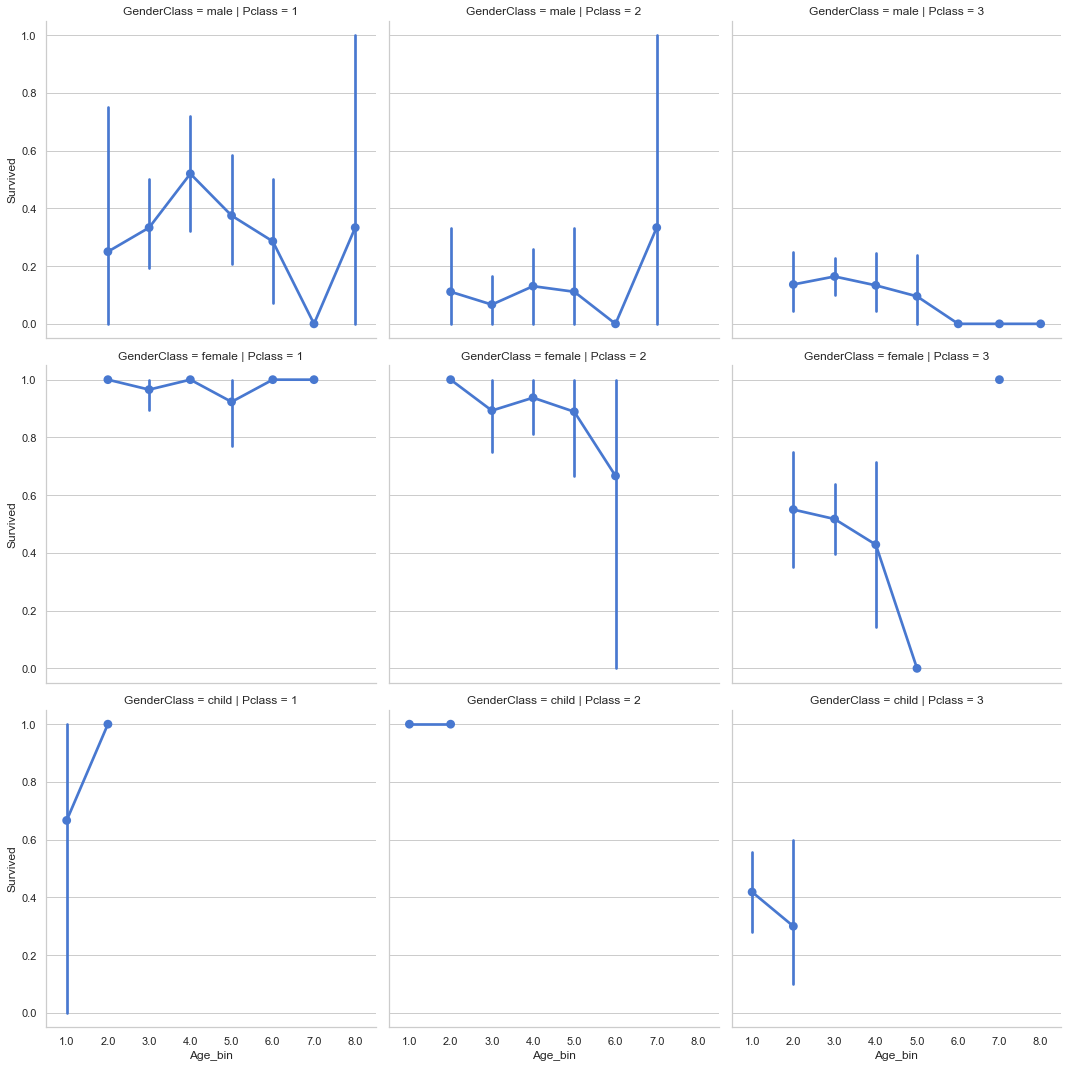

In [367]:
sns.factorplot('Age_bin','Survived', col='Pclass', row='GenderClass',kind='point',data=titanic_data)
plt.show()

From the factor plot:<br/>

- In general for males, as __Pclass increases, survival probability decreases.__
- For the rest of the females, as _Pclass increases_, _survival probability decreases._<br/>
- You can also see survival rate within each Pclass for males and females.

<a id=section408></a>

### 4.8 Analysing survival rate with FamilySize.

- Using __factorplot__ to know the survival rate on the basis of __FamilySize__.

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\aamit\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Survival by Total Family Size')

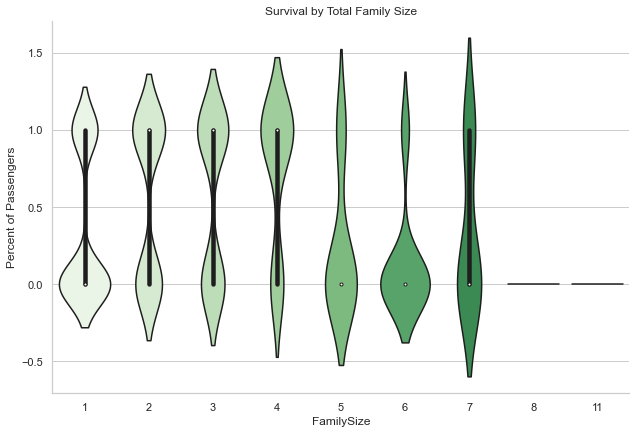

In [368]:
ax= sns.factorplot(x='FamilySize', y='Survived',data=titanic_data, kind='violin', aspect=1.5, size=6, palette='Greens')
ax.set(ylabel="Percent of Passengers")
plt.title('Survival by Total Family Size')

As __size of family increases__ its chances of survival also __increases__.

<a id=section409></a>

### 4.9 Segment fare in bins of size 12.

- Using Distplot to see the distribution of __Fare__. 

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


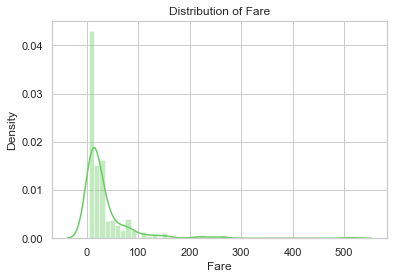

In [369]:
sns.distplot(titanic_data['Fare'], color='g')
plt.title('Distribution of Fare')
plt.show()

We have seen that __'Fare'__ mostly varies between __10 and 90.__ We will use this information to create bins.

- Creating a new column named __'Fare_bin'__ based on 12 interval ranges in 'Fare' as __12 bins.__

In [370]:
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['Fare']<=i*12, 'Fare_bin']=i
titanic_data.loc[titanic_data['Fare']>86, 'Fare_bin']=8

In [373]:
titanic_data[['Fare','Fare_bin']].groupby('Fare_bin')['Fare'].count()

Fare_bin
1.0    285
2.0    164
3.0    140
4.0     30
5.0     39
6.0     14
7.0     36
8.0     66
Name: Fare, dtype: int64

D:\Users\aamit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


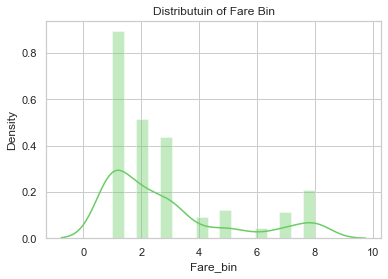

In [374]:
sns.distplot(titanic_data['Fare_bin'], color='g')
plt.title('Distributuin of Fare Bin')
plt.show()

In [376]:
titanic_data['Fare'].mean()
titanic_data['Fare'].median()

15.9

- Using __barrplot__ to plot the relationship between __survival rate and Fare_bin and Pclass.__

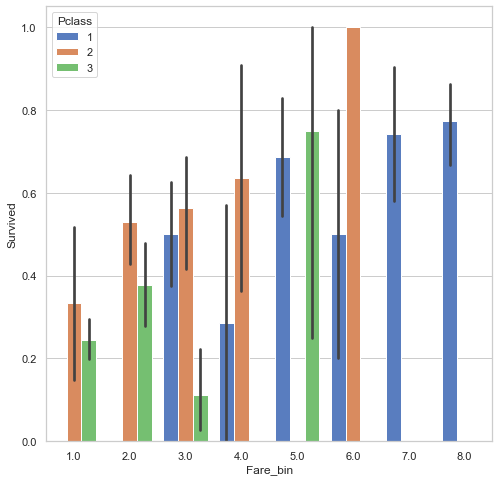

In [377]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Fare_bin', y='Survived', hue='Pclass', data=titanic_data, ax=ax)
plt.show()

- As __fare increases, survival chances also increases__.
- Also __Pclass 1__ (blue color) have __more chances to survive__ compared to other Pclass.

<a id=section410></a>

### 4.10 Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'

Text(0.5, 1.0, 'Pair Plot')

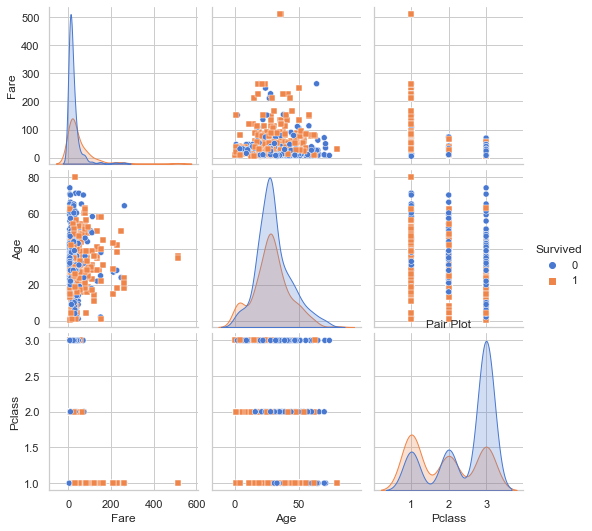

In [379]:
sns.pairplot(titanic_data[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'], hue='Survived', dropna=True, markers=['o','s'])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

<a id=section411></a>

### 4.11 Establish coorelation between all the features using heatmap.

Text(0.5, 1.0, 'Correlation between features')

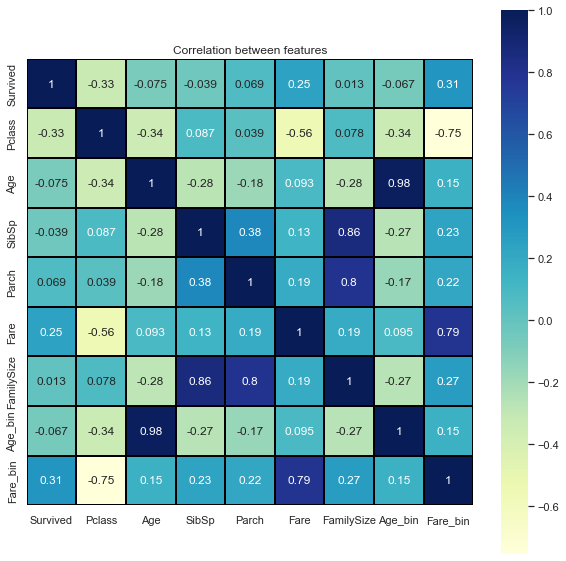

In [382]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, linewidth=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section412></a>

### 4.12 Hypothesis: Women and children are more likely to survive

On studying Questionnaire 4.1, 4.2 and 4.3 we observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

<a id=section5></a>

## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Age, Embarked, Fare, SibSp and Parch_ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 